# Income verification and loan defaulting rate
## by Kerolos

## Investigation Overview

> Describe the overall goals of your presentation here.

This presentation is to show how income information affect the loan defaulting rate 

## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

This data set contains 113,937 loans with 81 variables



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

# url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'

url = 'prosperLoanData.csv'


In [3]:
df = pd.read_csv(url)

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
### cleaning 

nulls = (df.isnull().sum() > 2000)
dfc = df.drop( nulls[nulls == True].index, axis=1 ) 

dfc.drop_duplicates(inplace=True)
dfc.drop(columns=['LoanKey', 'MemberKey', 'LoanNumber', 'ListingCreationDate', 'ListingNumber', 'ListingKey'], inplace=True)




In [5]:
### pereparations
loan_status = pd.get_dummies( dfc.LoanStatus)
dfc[loan_status.columns] = loan_status



> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

How income varifiablility can affect the loan status

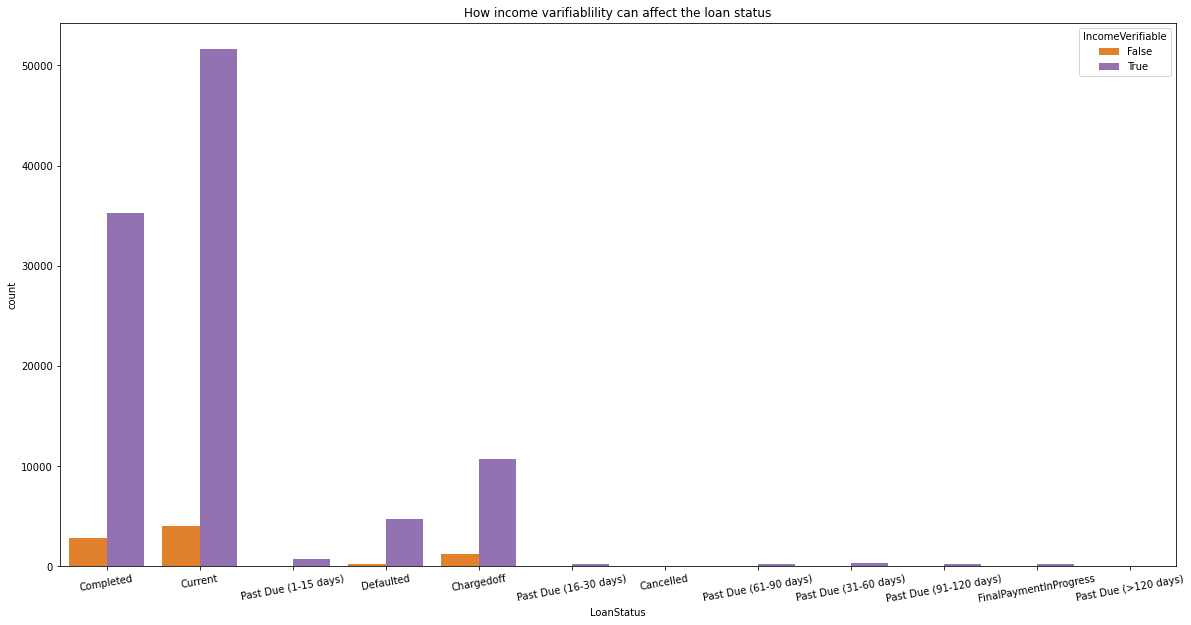

In [6]:
pal = np.array(sb.color_palette())
plt.rcParams['figure.figsize'] = (20, 10)

g = sb.countplot(x='LoanStatus',  hue='IncomeVerifiable', data=dfc, palette=pal[[1,4]], )
g.set_title('How income varifiablility can affect the loan status')

plt.xticks(rotation=10);

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

THis shows how income range can factor in the loan status

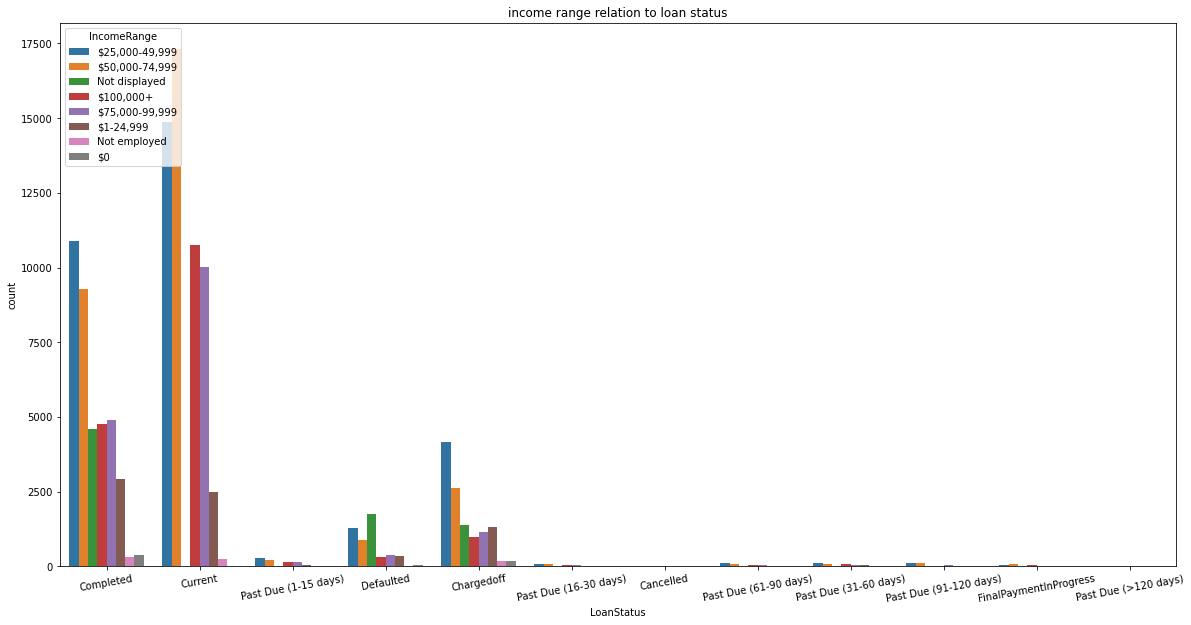

In [7]:
g = sb.countplot(x='LoanStatus',  hue='IncomeRange', data=dfc, palette=pal[[...]], )
g.set_title('income range relation to loan status')
plt.xticks(rotation=10);

## (Visualization 3)

Showing the different rates of defaulting across income range 

notice the loan defaulting peak at not displayed income status


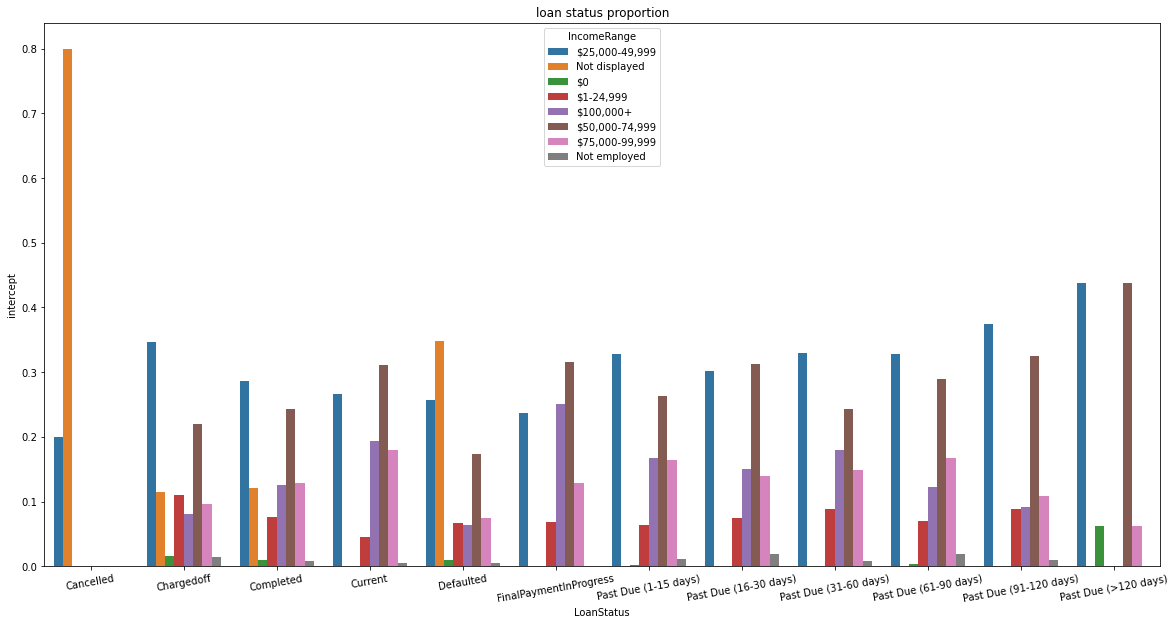

In [8]:
dfc['intercept'] = 1
prop = dfc.groupby(['LoanStatus', 'IncomeRange']).count()/ dfc.groupby('LoanStatus').count()
inter = prop.intercept.reset_index()
inter = inter.replace(np.nan, 0)
inter
# inter.plot(kind='bar', )
# prop[loan_status.columns]
fig = sb.barplot(x='LoanStatus', y='intercept', hue='IncomeRange', data=inter,  palette=pal[[...]])
fig.set_title("loan status proportion")
plt.xticks(rotation=10);



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [10]:
# raise "stop"

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-prompt --TagRemovePreprocessor.remove_input_tags={\"to_remove\"} --post serve --SlidesExporter.reveal_theme=simple
                                                                                                                
                                                                                                                
                                                                                                                